Stroop Test

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Question 1

1. What is our independent variable? What is our dependent variable?

<p style='color: blue;'>The independent variable is the congruent words condition (congruent or incongruent) and the dependent variable is the response time.</p>

Question 2

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

<p style='color: blue;'>H<span style='vertical-align:sub; font-size:75%;'>0</span> = The null hypothesis would be that there will be no difference in the response time given either congruent words condition.  </p>

<p style='color: blue;'>H<span style='vertical-align:sub; font-size:75%;'>1</span> = A reasonable alternative hypothesis would be that the congruent words condition will have faster response times. </p>

<p style='color: blue;'>Because our sample n is less than 30 and we do not know the population standard deviation we will use a t-test vs a z test.  Given that the same subjects are being measured under different conditions we'll use a dependent t-test (scipy's ttest_rel function for paired t-tests)  Correspondingly e could also perform a 1 sample test on the difference using the ttest_1samp function after calculating Congruent - Incongruent for each set of paired values.</p>

Question 3

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
#import the data and packages for the analysis

import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import scipy.stats as stats

stroop = pd.read_csv('C:\Users\ReneeD\Desktop\Udacity\stroopdata.csv')
stroop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 456.0 bytes


In [88]:
#run basic descriptive statistics

stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Question 4

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

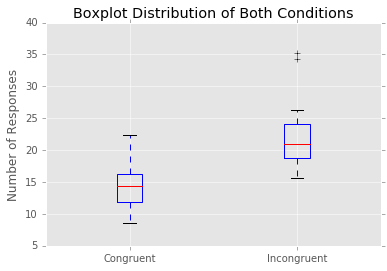

In [3]:
plt.boxplot([stroop.Congruent, stroop.Incongruent])
plt.xticks([1,2], ['Congruent', 'Incongruent'])
plt.ylabel('Number of Responses')
plt.title('Boxplot Distribution of Both Conditions')

<p style='color: blue;'>The incongruent group does appear to have some outliers that may skew the mean slightly higher but the median in the incongruent group is still higher as well.</p>

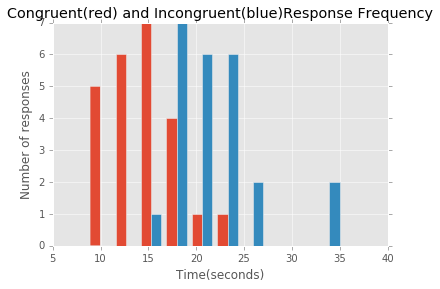

In [4]:
plt.hist([stroop.Congruent, stroop.Incongruent])
plt.xlim(5,40)
plt.xlabel('Time(seconds)')
plt.ylabel('Number of responses')
plt.title('Congruent(red) and Incongruent(blue)Response Frequency')

<p style='color: blue;'>The congruent responses sit further to left with only some overlap towards the center. The mode of the incongruent responses is also appearing to right of the mode of the congruent ones.</p>

Question 5

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [91]:
stats.t.ppf(.95, 23)
                    

1.7138715277470473

In [99]:
ttest = stats.ttest_rel(stroop.Congruent, stroop.Incongruent)
ttest

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

<p style='color: blue;'>The p value is less than .05 so we reject the null hypothesis.  There does appear to be a statistically significant difference between the two conditions.  This is the expected outcome for this task as it both intuitively makes sense and aligns with the initial descriptive statistics.</p>

Question 6 (Optional)

6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!
 
<p style='color: blue;'>The difference might be a representation of the 'processing time' for the brain to adjust for the incongruency.  

Another task that may produce similar results might be showing respondents a sequence of numbers and asking them to recall/enter them in the order displayed as condition one or in reverse order as condition two. </p>